In [1]:
# autoreload libaries
%load_ext autoreload
%autoreload 2

In [2]:
import data_load
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta


In [3]:
cdc_frames = data_load.get_cdc_dataframe ()
jhu_frames = data_load.get_jhu_dataframe ()
jhu_weekly_df = data_load.get_jhu_dataframe_weekly ()
baseline2_df = data_load.get_linear_baseline()

cdc_frames.loc[cdc_frames.Model == "COVIDhub-baseline", "Model"] = "Baseline I"

In [4]:
!pip install seaborn

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl

legend_elements = [
    Patch(facecolor='#a157db', label='Epi Models'),
    Patch(facecolor='#57db80', label='ML Models'),
    Patch(facecolor='#db57b2', label='Ensemble Models'),
    Patch(facecolor='#8f9194', label='Baselines'),
    Patch(facecolor='#e8d264', label='Others'),
    Patch(facecolor='#57d3db', label='Not Defined'),
]

# First

In [5]:
start = "2020-08-01"
end = "2020-08-31"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
stats["Baseline II"] = {}
stats["Baseline II"]["mae"] , stats["Baseline II"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df.sort_values("mae", ascending=True)[:-2]
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,Columbia_UNC-SurvCon,15.31,5
1,CovidAnalytics-DELPHI,22.61,5
2,LANL-GrowthRate,31.99,5
3,Baseline I,33.99,5
4,IowaStateLW-STEM,36.55,5
5,USACE-ERDC_SEIR,37.33,5
6,UCLA-SuEIR,37.35,5
7,JHU_IDD-CovidSP,45.32,5
8,UMich-RidgeTfReg,52.31,5
9,Covid19Sim-Simulator,62.67,5


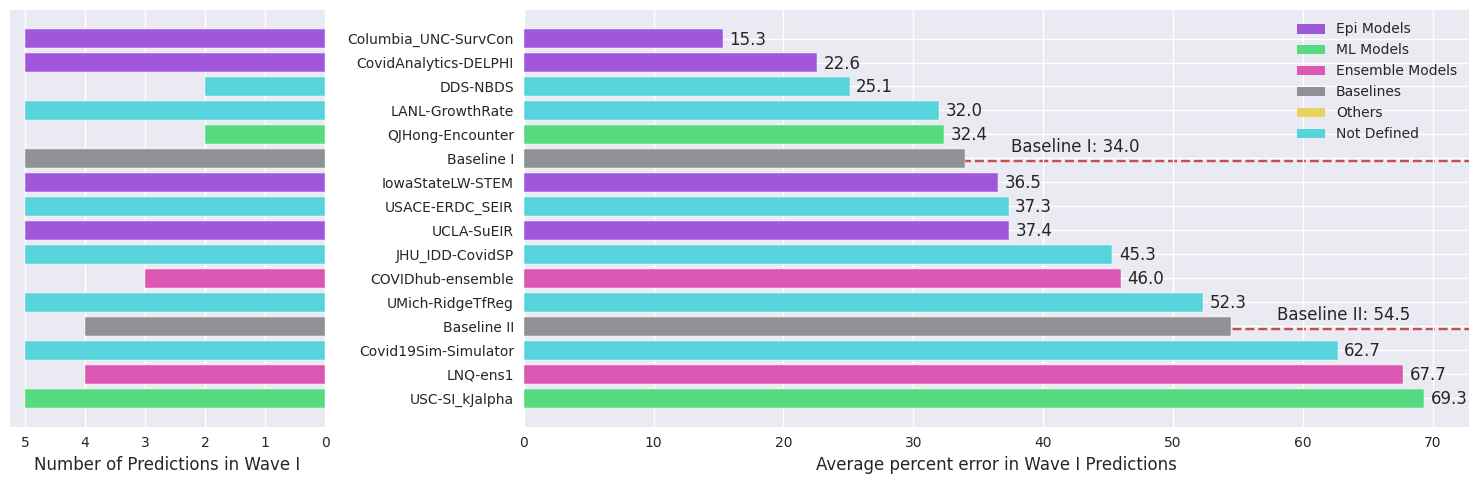

In [193]:
FIG_NAME = "MAE_FIRST_WAVE"
TS = 'Wave I'
FIG_SIZE = (15,5)
INLINE_LABEL_FONT_SIZE = 12
BASELINE_TEXT_GAP = 3.5

plot_df = stat_df
mpl.style.use("seaborn")
fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 9]}, figsize=(FIG_SIZE))
ax = [a0, a1]

color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))

a = ax[1].barh(plot_df["index"],  plot_df["mae"], color = color_array)
ax[1].set_xlabel(f'Average percent error in {TS} Predictions',fontsize=12);
ax[1].invert_yaxis()
ax[1].legend(handles=legend_elements, loc='upper right')


for i, v in enumerate(plot_df["mae"]):
    if "Baseline" in plot_df["index"][i]:
        ax[1].axhline(i+.1, color='r', linestyle='--', zorder=-1)
        ax[1].text(v + BASELINE_TEXT_GAP, i - .25,  plot_df["index"][i]+": "+ str(round(v,1)), fontsize=INLINE_LABEL_FONT_SIZE)
    else:
        ax[1].text(v + .5, i + .25, str(round(v,1)),  fontsize=INLINE_LABEL_FONT_SIZE)
    
ax[0].barh(plot_df["index"],  plot_df["pred_count"], color = color_array)
ax[0].set_xlabel(f'Number of Predictions in {TS}',fontsize=12);
ax[0].get_yaxis().set_visible(False)
ax[0].invert_yaxis()
ax[0].invert_xaxis()

plt.tight_layout()
plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# Second

In [6]:
start = "2020-09-01"
end = "2021-02-14"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
    
stats["Baseline II"] = {}
stats["Baseline II"]["mae"] , stats["Baseline II"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df[stat_df.mae <= 100]
stat_df = stat_df.sort_values("mae", ascending=True)
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,IQVIA_ACOE-STAN,5.69,1
1,UpstateSU-GRU,13.70,1
2,UCF-AEM,27.65,8
3,JHU_CSSE-DECOM,31.20,6
4,LNQ-ens1,32.11,22
5,COVIDhub-ensemble,32.63,22
6,QJHong-Encounter,32.67,22
7,BPagano-RtDriven,33.07,12
8,IowaStateLW-STEM,33.63,21
9,Microsoft-DeepSTIA,34.81,6


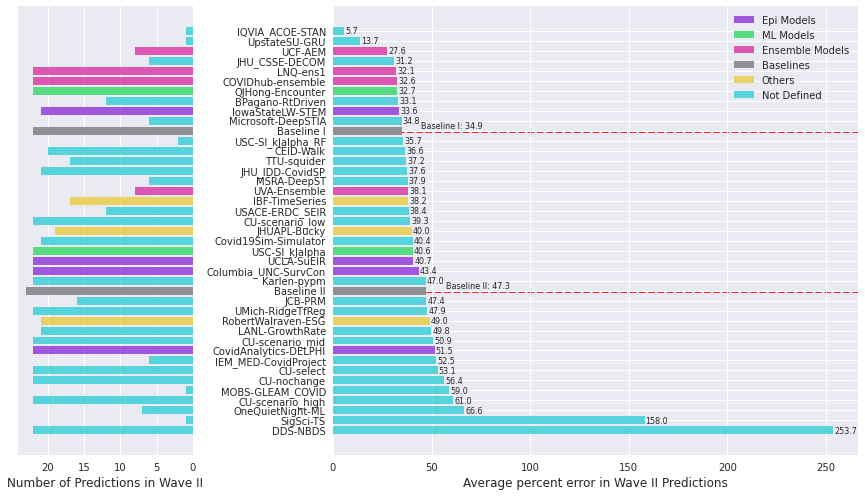

In [7]:
FIG_NAME = "MAE_SECOND_WAVE"
TS = 'Wave II'
FIG_SIZE = (12,7)
INLINE_LABEL_FONT_SIZE = 8
BASELINE_TEXT_GAP = 10

plot_df = stat_df
mpl.style.use("seaborn")
fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 9]}, figsize=(FIG_SIZE))
ax = [a0, a1]

color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))

a = ax[1].barh(plot_df["index"],  plot_df["mae"], color = color_array)
ax[1].set_xlabel(f'Average percent error in {TS} Predictions',fontsize=12);
ax[1].invert_yaxis()
ax[1].legend(handles=legend_elements, loc='upper right')


for i, v in enumerate(plot_df["mae"]):
    if "Baseline" in plot_df["index"][i]:
        ax[1].axhline(i+.1, color='r', linestyle='--', zorder=-1)
        ax[1].text(v + BASELINE_TEXT_GAP, i - .25,  plot_df["index"][i]+": "+ str(round(v,1)),  fontsize=INLINE_LABEL_FONT_SIZE)
    else:
        ax[1].text(v + .5, i + .25, str(round(v,1)),  fontsize=INLINE_LABEL_FONT_SIZE)
    
ax[0].barh(plot_df["index"],  plot_df["pred_count"], color = color_array)
ax[0].set_xlabel(f'Number of Predictions in {TS}',fontsize=12);
ax[0].get_yaxis().set_visible(False)
ax[0].invert_yaxis()
ax[0].invert_xaxis()

plt.tight_layout()
plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# Third

In [196]:
start = "2021-02-15"
end = "2021-07-26"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
    
stats["Baseline II"] = {}
stats["Baseline II"]["mae"] , stats["Baseline II"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df[stat_df.mae <= 100]
stat_df = stat_df.sort_values("mae", ascending=True)
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,USC-SI_kJalpha,38.76,24
1,CU-scenario_low,47.94,24
2,LANL-GrowthRate,48.17,23
3,LNQ-ens1,49.30,21
4,MUNI-ARIMA,50.20,8
5,JHUAPL-Bucky,53.82,24
6,TTU-squider,54.48,24
7,Covid19Sim-Simulator,54.86,24
8,COVIDhub-trained_ensemble,55.19,14
9,SigSci-TS,56.57,13


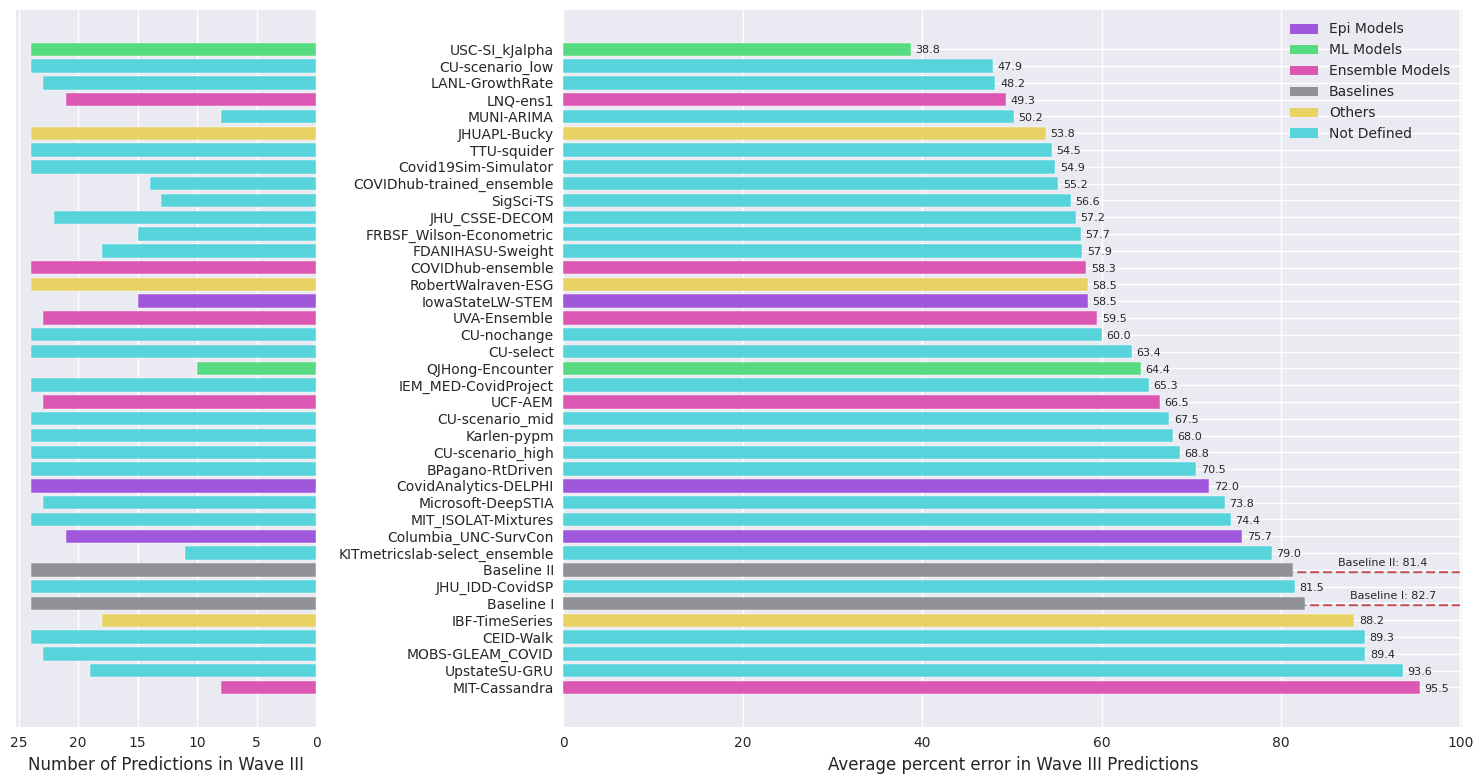

In [197]:
FIG_NAME = "MAE_THIRD_WAVE"
TS = 'Wave III'
FIG_SIZE = (15,8)
INLINE_LABEL_FONT_SIZE = 8
BASELINE_TEXT_GAP = 5

plot_df = stat_df
mpl.style.use("seaborn")
fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 9]}, figsize=(FIG_SIZE))
ax = [a0, a1]

color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))

a = ax[1].barh(plot_df["index"],  plot_df["mae"], color = color_array)
ax[1].set_xlabel(f'Average percent error in {TS} Predictions',fontsize=12);
ax[1].invert_yaxis()
ax[1].legend(handles=legend_elements, loc='upper right')


for i, v in enumerate(plot_df["mae"]):
    if "Baseline" in plot_df["index"][i]:
        ax[1].axhline(i+.1, color='r', linestyle='--', zorder=-1)
        ax[1].text(v + BASELINE_TEXT_GAP, i - .25,  plot_df["index"][i]+": "+ str(round(v,1)), fontsize=INLINE_LABEL_FONT_SIZE)
    else:
        ax[1].text(v + .5, i + .25, str(round(v,1)),  fontsize=INLINE_LABEL_FONT_SIZE)
    
ax[0].barh(plot_df["index"],  plot_df["pred_count"], color = color_array)
ax[0].set_xlabel(f'Number of Predictions in {TS}',fontsize=12);
ax[0].get_yaxis().set_visible(False)
ax[0].invert_yaxis()
ax[0].invert_xaxis()

plt.tight_layout()
plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# OVERALL

In [198]:
start = "2020-02-15"
end = "2021-08-26"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
    
stats["Baseline II"] = {}
stats["Baseline II"]["mae"] , stats["Baseline II"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df[stat_df.mae <= 100]
stat_df = stat_df.sort_values("mae", ascending=True)
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,USACE-ERDC_SEIR,38.05,17
1,QJHong-Encounter,41.99,34
2,USC-SI_kJalpha,42.57,51
3,LNQ-ens1,42.82,47
4,IowaStateLW-STEM,43.08,41
5,CU-scenario_low,43.82,46
6,COVIDhub-ensemble,46.03,49
7,LANL-GrowthRate,47.23,49
8,TTU-squider,47.31,41
9,JCB-PRM,47.37,16


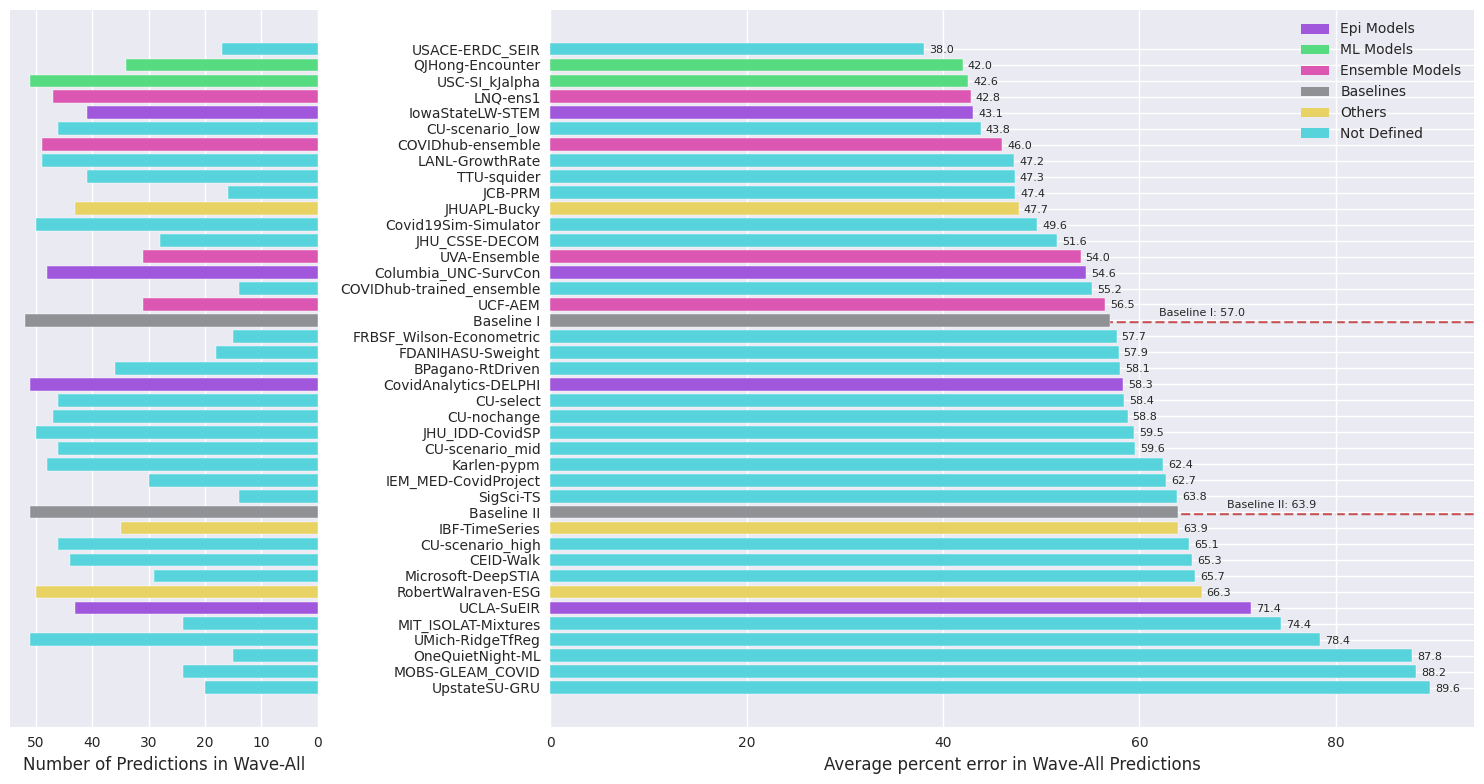

In [199]:
FIG_NAME = "MAE_OVERALL_WAVE"
TS = 'Wave-All'
INLINE_LABEL_FONT_SIZE = 8
BASELINE_TEXT_GAP = 5

plot_df = stat_df
mpl.style.use("seaborn")
fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 9]}, figsize=(FIG_SIZE))
ax = [a0, a1]

color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))

a = ax[1].barh(plot_df["index"],  plot_df["mae"], color = color_array)
ax[1].set_xlabel(f'Average percent error in {TS} Predictions',fontsize=12);
ax[1].invert_yaxis()
ax[1].legend(handles=legend_elements, loc='upper right')


for i, v in enumerate(plot_df["mae"]):
    if "Baseline" in plot_df["index"][i]:
        ax[1].axhline(i+.1, color='r', linestyle='--', zorder=-1)
        ax[1].text(v + BASELINE_TEXT_GAP, i - .25,  plot_df["index"][i]+": "+ str(round(v,1)), fontsize=INLINE_LABEL_FONT_SIZE)
    else:
        ax[1].text(v + .5, i + .25, str(round(v,1)),  fontsize=INLINE_LABEL_FONT_SIZE)
    
ax[0].barh(plot_df["index"],  plot_df["pred_count"], color = color_array)
ax[0].set_xlabel(f'Number of Predictions in {TS}',fontsize=12);
ax[0].get_yaxis().set_visible(False)
ax[0].invert_yaxis()
ax[0].invert_xaxis()

plt.tight_layout()
plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

In [186]:
plot_df

,index,mae,pred_count
0,USACE-ERDC_SEIR,38.05,17
1,QJHong-Encounter,41.99,34
2,USC-SI_kJalpha,42.57,51
3,LNQ-ens1,42.82,47
4,IowaStateLW-STEM,43.08,41
5,CU-scenario_low,43.82,46
6,COVIDhub-ensemble,46.03,49
7,LANL-GrowthRate,47.23,49
8,TTU-squider,47.31,41
9,JCB-PRM,47.37,16
